# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [2]:
url = r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

df = pd.read_csv(url, sep='\t')

### Step 4. See the first 10 entries

In [3]:
df.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

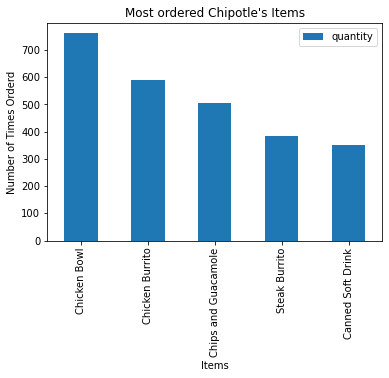

In [21]:
top_5 = df[['quantity', 'item_name']].groupby('item_name').sum().sort_values(by='quantity', ascending=False).iloc[0:5,:]

top_5.plot(kind='bar')
plt.xlabel('Items')
plt.ylabel('Number of Times Orderd')
plt.title('Most ordered Chipotle\'s Items')
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [38]:
func = lambda x: float(x[1:])
df['item_price'] = df['item_price'].apply(func)

In [45]:
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


<AxesSubplot:xlabel='item_price', ylabel='quantity'>

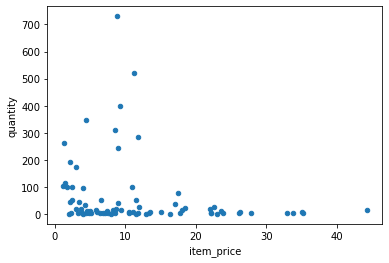

In [44]:
quantity_per_price = df[['item_price', 'quantity']].groupby('item_price').sum()
quantity_per_price.reset_index(inplace=True)
quantity_per_price.plot(kind='scatter', x='item_price', y='quantity')

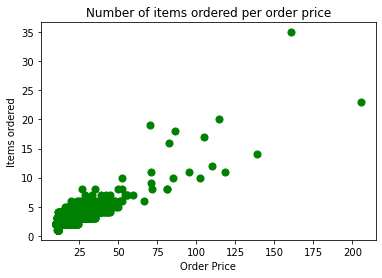

In [49]:
orders = df.groupby('order_id').sum()
orders.plot(kind='scatter', x='item_price', y='quantity', s=50, c='green')
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.

<AxesSubplot:xlabel='item_name'>

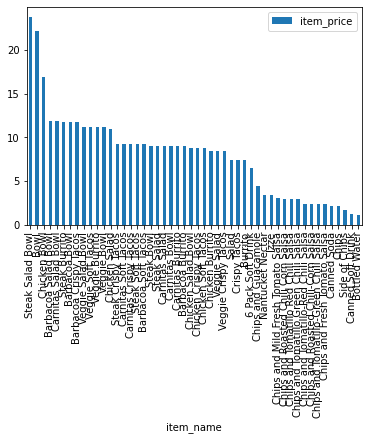

In [83]:
prices = df[['item_name', 'item_price']].drop_duplicates(subset='item_name', ignore_index=True).sort_values(by='item_price', ascending=False)
prices.plot(kind='bar', x='item_name', y='item_price')

<AxesSubplot:>

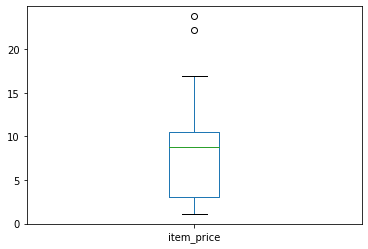

In [84]:
prices.plot(kind='box')